# Lab 6

# Multi-layer Perceptron
## Submitted to : Prof. Sweetlin Hemlatha
## Submitted by: Prateek Singh (15BCE1091)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [4]:
banknote_data = pd.read_csv("banknote.csv")

In [5]:
banknote_data.head()

,Variance,Skewness,Kurtosis,Entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
X = banknote_data.values[:, :4]
Y = banknote_data.values[:, 4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=50)
mlp.fit(X_train, Y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
predictions = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions))

[[83 80]
 [83 29]]


In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=50)
mlp.fit(X_train, Y_train)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
predictions = mlp.predict(X_test)
print(confusion_matrix(Y_test, predictions))

[[163   0]
 [  0 112]]


## On my own dataset

In [3]:
red_wine_data = pd.read_csv('../Dataset/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('../Dataset/winequality-white.csv', sep=';')

wine_data = pd.concat([red_wine_data, white_wine_data])

bins = (2, 6.5, 10)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
label_quality = LabelEncoder()
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
wine_data['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_data.iloc[:,:11].values)

wine_data_scaled = pd.DataFrame(scaled_features, index=wine_data.index, columns=wine_data.columns[:11])
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464


## Plotting the distribution of quality w.r.t various levels of alcohol in the data

/home/prateek/anaconda3/envs/dltf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/prateek/anaconda3/envs/dltf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


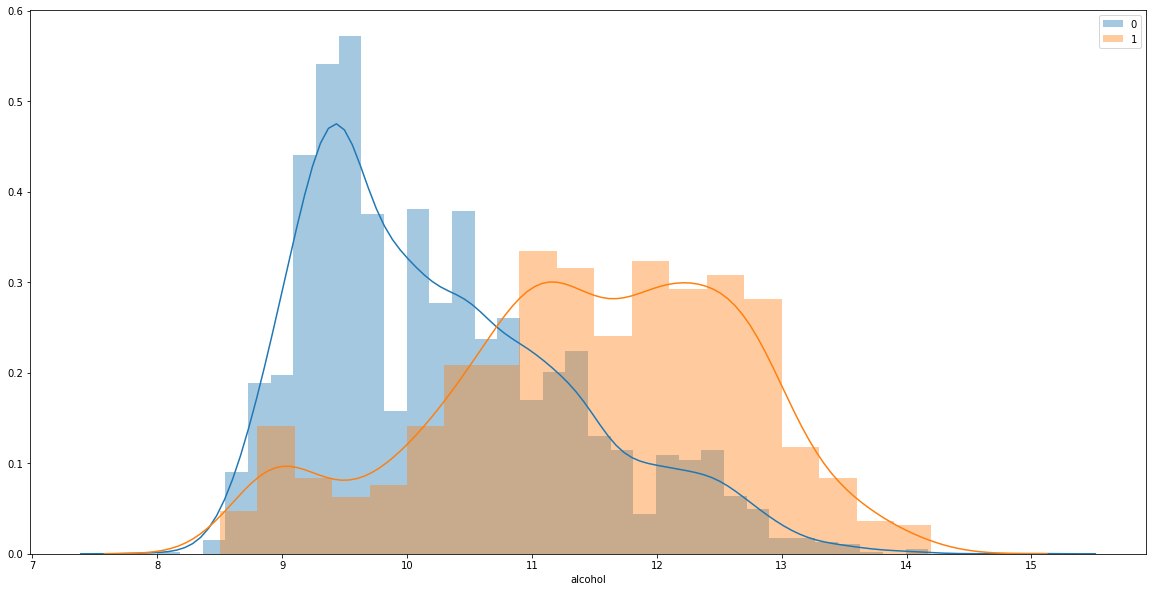

In [7]:
plt.figure(figsize = (20,10))
for i in wine_data.quality.unique():
    sb.distplot(wine_data['alcohol'][wine_data.quality == i], kde=1, label='{}'.format(i))

plt.legend()

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(wine_data_scaled, 
                                                    wine_data.iloc[:,11], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [77]:
a = np.array(X_train.iloc[:, [1, 10]])
a.shape

(5197, 2)

In [63]:
def plot_decision_surface(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

First lets plot the data on just two most important features from the dataset and observe the performance. From the logistic regression experiment we know that feature number 1 which is volatile acidity and feature 10, which is the fixed acidity are most important features in the dataset. And thus we train an mlp classifier over these two features so as to visualize the results and then we use the full dataset to obtain better accuracy 

In [97]:
hidden_layers = (10)

mlp_2 = MLPClassifier(activation='logistic', alpha=1e-05, 
                    batch_size='auto', 
                    hidden_layer_sizes=hidden_layers, 
                    learning_rate='adaptive',
                    learning_rate_init=0.0001,
                    max_iter=2000, warm_start=True)

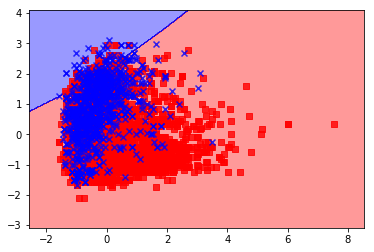

In [98]:
mlp_2.fit(X_train.iloc[:, [1, 10]], Y_train)
plot_decision_regions(X=a, y = np.array(Y_train.values), classifier=mlp_2)

In [99]:
mlp.score(X_train.iloc[:, [1, 10]], Y_train)

0.8027708293246103

In [113]:
hidden_layers = (20, 15)

mlp = MLPClassifier(activation='logistic', alpha=1e-05, 
                    batch_size='auto', 
                    hidden_layer_sizes=hidden_layers, 
                    learning_rate='adaptive',
                    learning_rate_init=0.0001,
                    max_iter=3000, warm_start=True)

In [114]:
mlp.fit(X_train, Y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15), learning_rate='adaptive',
       learning_rate_init=0.0001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True)

In [115]:
mlp.score(X_train, Y_train)

0.8158553011352704